In [1]:
!pip install farsi-tools

In [3]:
!pip install regex

     |████████████████████████████████| 696kB 927kB/s eta 0:00:01
  Created wheel for regex: filename=regex-2020.7.14-cp37-cp37m-macosx_10_9_x86_64.whl size=285968 sha256=9490c959889519005f126e5f5d9510861d915043719c0651b7403e9a5eb4c351
  Stored in directory: /Users/mehrunisaqayyum/Library/Caches/pip/wheels/53/55/dc/e17fa4568958f4c53be34b65e474a1327b64641f65df379ec3
Successfully built regex


# Introduction & Part 1: 
https://nbviewer.jupyter.org/github/pitaconsumer/Capstone-5/blob/master/Capstone%205_Unsupervised%20Learning%20_Twitter_Build%20A%20Semantic%20Analysis%20%283%29.ipynb

In [1]:
import tweepy 
from textblob import TextBlob
import re
import regex                    #To remove non-Latin characters
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

import json
import pickle
import farsi_tools 

In [8]:
#Read saved, cleaned corpus from GitHub raw file
     #Convert to pd
df = pd.read_json('https://raw.githubusercontent.com/pitaconsumer/Capstone-5/master/final_corpus.json', lines= True)
df

,Tweets,is_in_farsi,tweets_fixed
0,'Normalization' with Israel?\n\nThe only thing...,False,Normalization with Israel The only thing t...
1,"""All options on the table"" has long been a sta...",False,All options on the table has long been a sta...
2,First Session\nhttps://t.co/1iPd6jOYJG\nSecond...,False,First Session Second Session Third Session ...
3,"Over five on-line video sessions, I presented ...",False,Over five on line video sessions I presented ...
4,"Since 680 CE, millions of Muslims have commemo...",False,Since CE millions of Muslims have commemo...
...,...,...,...
171,"Israel today tested a nuke-missile, aimed at I...",False,Israel today tested a nuke missile aimed at I...
172,Brian Hook has given our E3 #JCPOA partners a ...,False,Brian Hook has given our E JCPOA partners a t...
173,"Detailed, legal rebuttal of the E3 letter to t...",False,Detailed legal rebuttal of the E letter to t...
174,Latest E3 letter to UNSG on missiles is a desp...,False,Latest E letter to UNSG on missiles is a desp...


## Exploratory Data Analysis

### Figure 1: Wordcloud of Top Words 


<function matplotlib.pyplot.show(*args, **kw)>

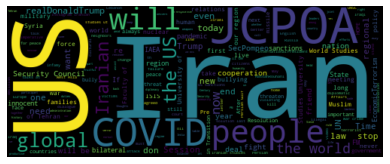

In [8]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['tweets_fixed']])
WordCloud = WordCloud(width = 500, height= 200, random_state = 21, 
                      max_font_size =150).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

# Analysis 1: Latent Semantic Analysis: 
https://nbviewer.jupyter.org/github/pitaconsumer/Capstone-5/blob/master/Capstone%205_Unsupervised%20Learning%20_Twitter_Build%20A%20Semantic%20Analysis%20%283%29.ipynb


# Analysis 2: Topic Modeling

Before we undertake different unsupervised models to conduct topic modeling, we need to create a tfidf matrix that vectorizes our labels and use those associated values. 

### TFIDF
Implement Term Frequency-Inverse Document Frequency for Topic Modeling and Clustering. TF = (Number of times term t appears in a document)/(Number of terms in the document) IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in. TF-IDF = TF*IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
#Remove stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [11]:
results = tfidf_vectorizer.fit_transform(df['tweets_fixed'])

In [12]:
results

<176x1883 sparse matrix of type '<class 'numpy.float64'>'
	with 3485 stored elements in Compressed Sparse Row format>

## LDA

In [13]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

#### LDA when components =100

In [14]:
#Change default of 10 to 100
lda = LatentDirichletAllocation(n_components =100)
lda

LatentDirichletAllocation(n_components=100)

In [15]:
lda.fit(results) # default was n_components = 10, now it's 100

LatentDirichletAllocation(n_components=100)

In [16]:
lda_model_df = pd.DataFrame(lda.components_, columns=tfidf_vectorizer.get_feature_names())
lda_model_df
#Note the vectorized columns' labels adjusted b/c using only 1 language w/o noise of vectors including 
    #foreign characters not read by different language library

,abandon,abase,abattoirs,abdullah,abeshizo,abetting,abiding,ability,abject,abroad,...,year,yearly,years,yemen,yemenis,young,yrs,zahra,zero,zoroastrians
0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.213383,0.01,0.01,0.010000,0.010000,0.01,0.010000,0.01,0.01,0.01
1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.010000,0.01,0.01,0.010000,0.010000,0.01,0.010000,0.01,0.01,0.01
2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.010000,0.01,0.01,0.010000,0.010000,0.01,0.010000,0.01,0.01,0.01
3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.010000,0.01,0.01,0.010000,0.010000,0.01,0.010000,0.01,0.01,0.01
4,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.010000,0.01,0.01,0.173440,0.197092,0.01,0.010000,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.010000,0.01,0.01,0.010000,0.010000,0.01,0.010000,0.01,0.01,0.01
96,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.010000,0.01,0.01,0.212779,0.010000,0.01,0.189088,0.01,0.01,0.01
97,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.010000,0.01,0.01,0.010000,0.010000,0.01,0.010000,0.01,0.01,0.01
98,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.010000,0.01,0.01,0.010000,0.010000,0.01,0.010000,0.01,0.01,0.01


In [17]:
for number in range(lda_model_df.shape[0]):
    print(lda_model_df.iloc[number].idxmax())

parliament
abandon
studies
abandon
rep
military
law
abandon
watch
process
urgent
ps
crime
session
guest
anti
session
abandon
reminder
law
pm
abeshizo
high
aided
abandon
make
russian
barzani
pandemic
gmt
ut
bare
violating
christmas
uk
priority
frighten
int
abandon
words
iran
factsheet
damages
abandon
affecting
read
international
normalized
ramadan
foreign
abandon
isis
incl
council
abandon
american
abandon
abandon
honor
sanctions
abandon
sites
nuclear
russia
home
dictated
studies
google
india
world
read
deal
step
abzayed
aparat
jcpoa
came
certificate
don
lawlessness
takes
face
dreaming
al
iran
humans
accountability
testing
uk
iaea
abandon
just
add
dec
tyranny
addressing
afghanistan
abandon
people
abandon


In [21]:
#Define Function 'print_top_words' based on model, respective feature names and number of top words.
def print_top_words(model, feature_names, n_top_words):
     for topic_idx, topic in enumerate(model.components_):
         message = "Topic #%d: " % topic_idx
         message += " ".join([feature_names[i]
                              for i in topic.argsort()[:-n_top_words - 1:-1]])
         print(message)
     print()

In [23]:
#Define number of top words for topics in each grouping for 100 n_components
n_top_words = 10

print("\nTopics in LDA model:")
tf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: parliament new gcc iran persian region emerge seize videos forge
Topic #1: zoroastrians final families family farsi fatima feast fed felonious field
Topic #2: studies august tooic characteristics streamed period monday rd transitional second
Topic #3: zoroastrians final families family farsi fatima feast fed felonious field
Topic #4: rep special met peace urged forcing hold accountable jeopardizes nd
Topic #5: military western shows vote result takhtravanchi isolation embargo people rt
Topic #6: law geography severely urging hampered informs recognize counterparts politics means
Topic #7: zoroastrians final families family farsi fatima feast fed felonious field
Topic #8: watch today change ago end administration embargo regime response med
Topic #9: process peace prisoner ball heart neighborsfirst development exchange getting istanbul
Topic #10: urgent steal abase neck cheat knee habitually brought technique lie
Topic #11: ps tragedy fp experts impacted 

## LDA Model 2: N_components = 1,1000 and 10 topics

In [24]:
lda_2 = LatentDirichletAllocation(n_components =1000)
lda_2

LatentDirichletAllocation(n_components=1000)

In [25]:
lda_2.fit(results) # default was n_components = 100, now it's 1,000

/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_lda.py:806: RuntimeWarning: overflow encountered in exp
  return np.exp(-1.0 * perword_bound)


LatentDirichletAllocation(n_components=1000)

In [26]:
lda_model_df_2 = pd.DataFrame(lda_2.components_, columns=tfidf_vectorizer.get_feature_names())
lda_model_df_2

,abandon,abase,abattoirs,abdullah,abeshizo,abetting,abiding,ability,abject,abroad,...,year,yearly,years,yemen,yemenis,young,yrs,zahra,zero,zoroastrians
0,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
1,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
3,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
4,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
996,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
997,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
998,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [27]:
for number in range(lda_model_df_2.shape[0]):
    print(lda_model_df_2.iloc[number].idxmax())

abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon


In [28]:
#Define number of top words for topics in each grouping
n_top_words = 10

print("\nTopics in LDA model:")
tf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda_2, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: zoroastrians final families family farsi fatima feast fed felonious field
Topic #1: zoroastrians final families family farsi fatima feast fed felonious field
Topic #2: zoroastrians final families family farsi fatima feast fed felonious field
Topic #3: zoroastrians final families family farsi fatima feast fed felonious field
Topic #4: zoroastrians final families family farsi fatima feast fed felonious field
Topic #5: zoroastrians final families family farsi fatima feast fed felonious field
Topic #6: zoroastrians final families family farsi fatima feast fed felonious field
Topic #7: zoroastrians final families family farsi fatima feast fed felonious field
Topic #8: zoroastrians final families family farsi fatima feast fed felonious field
Topic #9: zoroastrians final families family farsi fatima feast fed felonious field
Topic #10: zoroastrians final families family farsi fatima feast fed felonious field
Topic #11: zoroastrians final families family farsi f

#### Note:  zoroastrians final families family farsi fatima feast fed felonious field
These results oddly include words beginning with 'f', after 'zoroastrian'.

## Analysis II: Topic Modeling with NNMF
### NNMF Model 1: N_components =50, 10 topics

In [26]:
# Fit the NMF with more manageable size of n_components, like 50

nmf = NMF(n_components=50, random_state=1,
          alpha=.1, l1_ratio=.5) #not results, but transformed df['tweets_fixed']from preceding cell

nmf

NMF(alpha=0.1, l1_ratio=0.5, n_components=50, random_state=1)

In [27]:
nmf_model_df = nmf.fit_transform(results)

In [28]:
nmf.components_.shape

(50, 1883)

In [29]:
nmf_model_df = pd.DataFrame(nmf.components_, columns=tfidf_vectorizer.get_feature_names())

for number in range(nmf_model_df.shape[0]):
  print(nmf_model_df.iloc[number].idxmax())

studies
abandon
law
abandon
iabbasian
close
council
lebanon
persian
abandon
ps
abandon
session
abandon
abandon
high
abandon
abandon
abandon
abandon
google
transition
lebanon
abandon
american
abandon
words
parliament
solution
abandon
presentation
abandon
tyranny
going
arms
iaea
face
ceased
yearly
testing
abandon
bare
talk
russian
abandon
air
add
glad
aircraft
thread


In [61]:
print_top_words(nmf, tfidf_feature_names, 10)

Topic #0: studies ut world faculty university instagram online live tehran utc
Topic #1: zoroastrians final families family farsi fatima feast fed felonious field
Topic #2: law unsc rule council security statement multilateralism int agenda accountability
Topic #3: zoroastrians final families family farsi fatima feast fed felonious field
Topic #4: iabbasian zoroastrians final families family farsi fatima feast fed felonious
Topic #5: depth close consultations istanbul exchange issues priority senior mevlutcavusoglu friend
Topic #6: council security destroy using published just violating isn did fight
Topic #7: lebanon solidarity assist iran people security dictate beirut impose reiterated
Topic #8: persian english aparat new better seize forge emerge videos nowruz
Topic #9: zoroastrians final families family farsi fatima feast fed felonious field
Topic #10: ps victims families ministry embassies assistance foreign tragedy instructed practical
Topic #11: zoroastrians final families fami

In [30]:
#Cool results
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names


Topics in NMF model (Frobenius norm):


['abandon',
 'abase',
 'abattoirs',
 'abdullah',
 'abeshizo',
 'abetting',
 'abiding',
 'ability',
 'abject',
 'abroad',
 'absent',
 'absurd',
 'abt',
 'abuse',
 'abzayed',
 'ac',
 'accept',
 'access',
 'accessories',
 'accessory',
 'accomplished',
 'accord',
 'account',
 'accountability',
 'accountable',
 'achieved',
 'achievement',
 'achieving',
 'act',
 'action',
 'actions',
 'activation',
 'acts',
 'actually',
 'add',
 'addiction',
 'addictive',
 'address',
 'addressing',
 'adhere',
 'administration',
 'admit',
 'admits',
 'admitted',
 'admitting',
 'advanced',
 'advancing',
 'adventurism',
 'advice',
 'advised',
 'advising',
 'advisor',
 'advisors',
 'affairs',
 'affected',
 'affecting',
 'affects',
 'afghanistan',
 'afraid',
 'africa',
 'africaday',
 'african',
 'africans',
 'aftermath',
 'age',
 'agenda',
 'aggression',
 'agitate',
 'ago',
 'agreeable',
 'agreed',
 'agreement',
 'ahead',
 'aided',
 'aiding',
 'aim',
 'aimed',
 'aipac',
 'air',
 'aircraft',
 'airliner',
 'airline

In [39]:
print_top_words(nmf, tfidf_feature_names, 10)

Topic #0: studies ut world faculty university instagram online live tehran utc
Topic #1: zoroastrians final families family farsi fatima feast fed felonious field
Topic #2: law unsc rule council security statement multilateralism int agenda accountability
Topic #3: zoroastrians final families family farsi fatima feast fed felonious field
Topic #4: iabbasian zoroastrians final families family farsi fatima feast fed felonious
Topic #5: depth close consultations istanbul exchange issues priority senior mevlutcavusoglu friend
Topic #6: council security destroy using published just violating isn did fight
Topic #7: lebanon solidarity assist iran people security dictate beirut impose reiterated
Topic #8: persian english aparat new better seize forge emerge videos nowruz
Topic #9: zoroastrians final families family farsi fatima feast fed felonious field
Topic #10: ps victims families ministry embassies assistance foreign tragedy instructed practical
Topic #11: zoroastrians final families fami

### NNMF Model 2
Adjusting NNMF model n_components to 25, 10 topics, across sample of 25 tweets. 

In [40]:
#Now Fit the NNMF model and TRY 25 frequently used words as n_components
nmf_2 = NMF(n_components=25, random_state=1,
          alpha=.1, l1_ratio=.5) #not results, but transformed df['tweets_fixed']from preceding cell

nmf_2

NMF(alpha=0.1, l1_ratio=0.5, n_components=25, random_state=1)

In [41]:
#With 25 components fitted w/r/t results
nmf_2_model_df = nmf_2.fit_transform(results)

In [42]:
#Check shape for second iteration
nmf_2.components_.shape

(25, 1883)

In [43]:
#Read the top words with nmf_2 and nmf_2_model as df
nmf_2_model_df = pd.DataFrame(nmf_2.components_, columns=tfidf_vectorizer.get_feature_names())

for number in range(nmf_2_model_df.shape[0]):
  print(nmf_2_model_df.iloc[number].idxmax())

studies
abandon
law
malign
iabbasian
american
council
lebanon
persian
world
ps
article
published
google
session
exporting
advancing
capable
add
words
talk
law
presentation
yearly
urgent


In [44]:
#See listing for nmf_2 with 10 topic words each across 25 samples
print_top_words(nmf_2, tfidf_feature_names, 10)

Topic #0: studies world ut faculty university instagram online live tehran utc
Topic #1: zoroastrians final families family farsi fatima feast fed felonious field
Topic #2: law rule unsc council security statement multilateralism accountability agenda june
Topic #3: malign presence begun asia west end seen anti advising listen
Topic #4: iabbasian zoroastrians final families family farsi fatima feast fed felonious
Topic #5: american message president hassanrouhani important people felonious fifth field fed
Topic #6: council security destroy using published just violating jcpoa ceased isn
Topic #7: lebanon strong people iran solidarity assist stands steadfast sending reiterated
Topic #8: persian english aparat new better seize forge emerge videos nowruz
Topic #9: world normalization qualms flood impede declares outlaw desire lawful trying
Topic #10: ps victims families tragedy flash flag falsehood flimsy family farsi
Topic #11: defend article launched took senior aggression proportionate

### NNMF Model 3:
Adjusting NNMF model: 100 components, 10 topics, across sample of 100 tweets. 

In [56]:
# Fit the third NNMF model
#print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
 #     "tf-idf features, n_samples=%d and n_features=%d..."
  #    % (n_samples, n_features))

nmf_3 = NMF(n_components=100, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(results)
nmf_3

NMF(alpha=0.1, beta_loss='kullback-leibler', l1_ratio=0.5, max_iter=1000,
    n_components=100, random_state=1, solver='mu')

In [57]:
nmf_3_model_df = nmf_3.fit_transform(results)

In [58]:
#Different topics obtained from Kullback-Leibler Divergence
print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf_3, tfidf_feature_names, 10)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: studies world ut faculty university tehran talks instagram live utc
Topic #1: iran jcpoa realdonaldtrump obligations global iaea stop violating sanctions meeting
Topic #2: security law council int threatens statement long multilateralism accountability june
Topic #3: end malign presence begun asia west people advising clowns listen
Topic #4: iabbasian zoroastrians final families family farsi fatima feast fed felonious
Topic #5: regional bilateral issues global moscow cooperation talks depth consultations close
Topic #6: covid sanctions published just council security world transition destroy fight
Topic #7: lebanon people iran solidarity strong assist security beirut dictate resilient
Topic #8: english persian aparat new better seize emerge videos forge opportunity
Topic #9: world secpompeo long country terror threat nuclear wage racism blacklivesmatter
Topic #10: families victims tragedy ministry embassies assis

### NNMF Model 4: N_components =1000, 10 topics

In [54]:
nmf_4 = NMF(n_components=1000, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(results)
nmf_4

NMF(alpha=0.1, beta_loss='kullback-leibler', l1_ratio=0.5, max_iter=1000,
    n_components=1000, random_state=1, solver='mu')

In [55]:
nmf_4_model_df = nmf_4.fit_transform(results)

In [59]:
#Read the top words with nmf_4 and nmf_4_model as df
nmf_4_model_df = pd.DataFrame(nmf_4.components_, columns=tfidf_vectorizer.get_feature_names())

for number in range(nmf_4_model_df.shape[0]):
  print(nmf_4_model_df.iloc[number].idxmax())

abandon
abdullah
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
step
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
daughter
abandon
abandon
abandon
accept
iaea
abandon
abandon
abandon
abandon
abandon
abase
abandon
hate
abandon
abandon
abandon
abandon
abandon
law
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
rapid
historic
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
avoidance
bullies
abandon
abandon
abandon
abandon
abandon
abandon
abandon
accountability
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
afghanistan
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
tyranny
abandon
abandon
dohaforum
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
abandon
murder
abandon
abandon
abandon
a

In [60]:
#Different topics obtained from Kullback-Leibler Divergence
print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf_4, tfidf_feature_names, 10)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: zoroastrians final families family farsi fatima feast fed felonious field
Topic #1: bin lumpur mtgs abdullah mohamad chedetofficial mahathir warm kuala king
Topic #2: zoroastrians final families family farsi fatima feast fed felonious field
Topic #3: zoroastrians final families family farsi fatima feast fed felonious field
Topic #4: zoroastrians final families family farsi fatima feast fed felonious field
Topic #5: zoroastrians final families family farsi fatima feast fed felonious field
Topic #6: zoroastrians final families family farsi fatima feast fed felonious field
Topic #7: zoroastrians final families family farsi fatima feast fed felonious field
Topic #8: zoroastrians final families family farsi fatima feast fed felonious field
Topic #9: zoroastrians final families family farsi fatima feast fed felonious field
Topic #10: zoroastrians final families family farsi fatima feast fed felonious field
Topic #11: z

### Note: Like the second iteration of the LDA model, the results are extremely similar, with a few different topics emerging in #20, 39,48,... 444, 449,70, 472,